<a href="https://colab.research.google.com/github/blacPanthe/Global-Traffic-Acc/blob/main/Global_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive


drive.mount('/content/drive')
file_url="https://drive.google.com/file/d/1-6eVRFe-DvAE1dZRKjHlgF3HLw148gLU/view?usp=drive_link"


# file_url="/content/drive/MyDrive/Machine Learning Project- Global Traffic Accident/global_traffic_accidents.csv"
# gta_df =pd.read_csv(file_url)


file_id = file_url.split('/')[-2]
print(file_id)


dwn_url = 'https://drive.google.com/uc?id=1-6eVRFe-DvAE1dZRKjHlgF3HLw148gLU'
gta_df = pd.read_csv(dwn_url)
gta_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1-6eVRFe-DvAE1dZRKjHlgF3HLw148gLU


,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


# **Data Description**

In [ ]:
print(gta_df.head())
gta_df.head()
x= gta_df.shape[0]
y= gta_df.shape[1]


print( "number of rows:", x)
print( "number of columns:", y)
gta_df.describe()


  Accident ID        Date   Time           Location   Latitude   Longitude  \
0    b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1    debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2    6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3    425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4    90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   

  Weather Condition Road Condition  Vehicles Involved  Casualties  \
0              Snow          Snowy                  5           7   
1             Clear            Icy                  4           1   
2              Rain          Snowy                  1           7   
3             Storm            Wet                  4           0   
4             Storm          Snowy                  3           9   

              Cause  
0  Reckless Driving  
1     Drunk Driving  
2  Reckless Driving  
3     Drunk Driving  
4  Rec

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


# **Checking Missing Data**

In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(gta_df.isnull().sum())




Missing Values in Each Column:
Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64


# **Handling Duplicates**

In [ ]:
# Check for duplicate rows
duplicate_count = gta_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")
gta_df.nunique()
# Define specific columns to check for outliers
columns_to_check = ['Latitude', 'Longitude', 'Vehicles Involved', 'Casualties','hour','day','month','dayofweek','weekofyear']  # Replace with actual column names






Number of Duplicate Rows: 0


# **Feature extraction and Transformation(Time Based)**

In [ ]:
gta_df.info()
gta_df['Date'] = gta_df['Date'].astype(str)
gta_df['Time'] = gta_df['Time'].astype(str)


# Combine 'date' and 'time' into a single 'datetime' column
gta_df['datetime'] = pd.to_datetime(gta_df['Date'] + ' ' + gta_df['Time'])


# Drop the original 'date' and 'time' columns (optional)
gta_df = gta_df.drop(columns=['Date', 'Time'])


gta_df['hour'] = gta_df['datetime'].dt.hour
gta_df['day'] = gta_df['datetime'].dt.day
gta_df['month'] = gta_df['datetime'].dt.month
gta_df['dayofweek'] = gta_df['datetime'].dt.dayofweek
gta_df['weekofyear'] = gta_df['datetime'].dt.isocalendar().week
gta_df.head()
gta_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -

In [ ]:
# Calculate IQR for selected columns
Q1 = gta_df[columns_to_check].quantile(0.25)
Q3 = gta_df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1


# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers for selected columns
outliers = ((gta_df[columns_to_check] < lower_bound) | (gta_df[columns_to_check] > upper_bound)).sum()
print("Number of outliers per selected column:")
print(outliers)


# Filter out rows where any of the selected columns have outliers
gta_df_no_outliers = gta_df[~((gta_df[columns_to_check] < lower_bound) |
                              (gta_df[columns_to_check] > upper_bound)).any(axis=1)]




Number of outliers per selected column:
Latitude             0
Longitude            0
Vehicles Involved    0
Casualties           0
hour                 0
day                  0
month                0
dayofweek            0
weekofyear           0
dtype: Int64


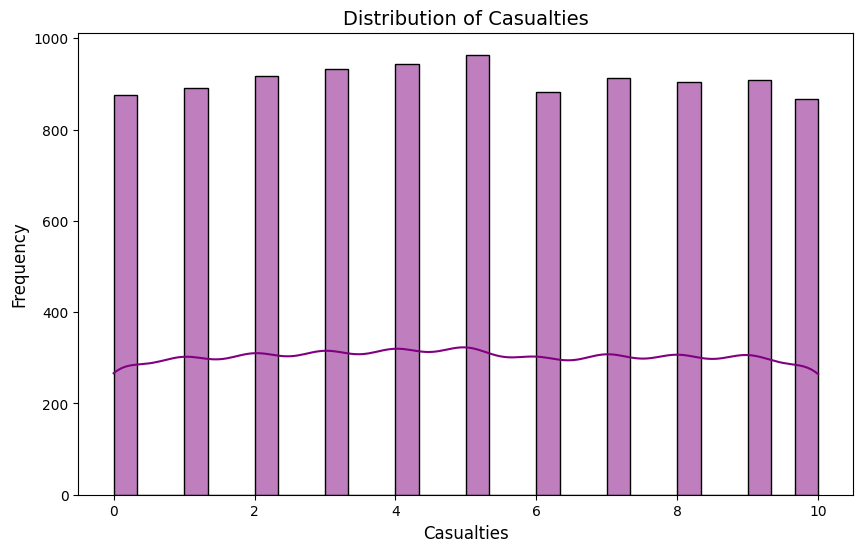

<ipython-input-8-1f23cf311f74>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather Condition', y='Casualties', data=gta_df, palette='Set2')


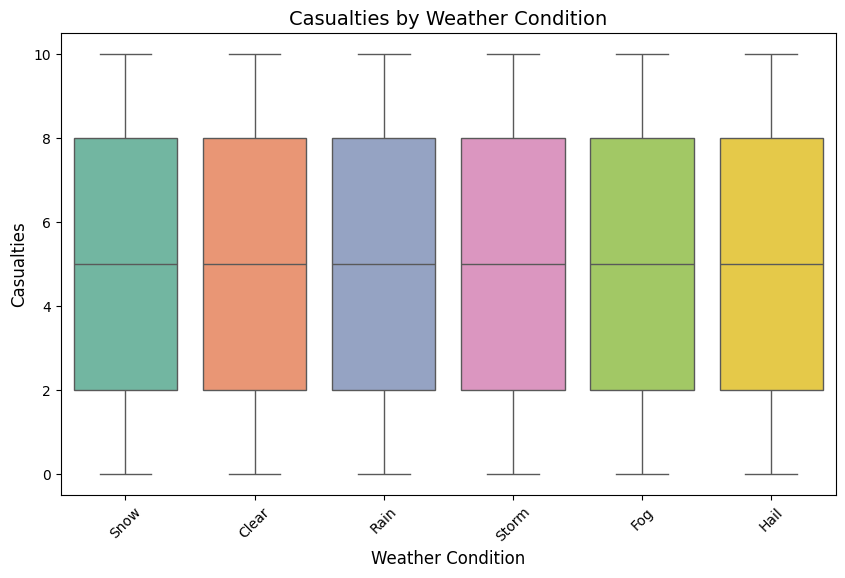

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Casualties Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gta_df['Casualties'], bins=30, kde=True, color='purple')
plt.title('Distribution of Casualties', fontsize=14)
plt.xlabel('Casualties', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize Weather Condition and Casualties
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Condition', y='Casualties', data=gta_df, palette='Set2')
plt.title('Casualties by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Casualties', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Data Transformation
# One-hot encoding for categorical variables
gta_df = pd.get_dummies(gta_df, columns=['Weather Condition', 'Road Condition', 'Cause'], drop_first=True)


gta_df.to_csv("cleaned_traffic_accidents.csv", index=False)


cleaned_df = pd.read_csv("cleaned_traffic_accidents.csv")
cleaned_df.head()
# Select all boolean columns
boolean_columns = gta_df.select_dtypes(include=['bool']).columns


# Convert boolean columns to integers (1/0)
gta_df[boolean_columns] = gta_df[boolean_columns].astype(int)


gta_df.head()


,Accident ID,Location,Latitude,Longitude,Vehicles Involved,Casualties,datetime,hour,day,month,...,Road Condition_Gravel,Road Condition_Icy,Road Condition_Snowy,Road Condition_Under Construction,Road Condition_Wet,Cause_Drunk Driving,Cause_Mechanical Failure,Cause_Reckless Driving,Cause_Speeding,Cause_Weather Conditions
0,b0dd6f57,"Mumbai, India",13.488432,-73.290682,5,7,2023-04-19 06:39:00,6,19,4,...,0,0,1,0,0,0,0,1,0,0
1,debfad09,"São Paulo, Brazil",-37.798317,-32.244242,4,1,2023-01-17 02:47:00,2,17,1,...,0,1,0,0,0,1,0,0,0,0
2,6d69aa36,"Sydney, Australia",33.767869,104.869018,1,7,2024-04-09 02:55:00,2,9,4,...,0,0,1,0,0,0,0,1,0,0
3,425bb1f0,"Tokyo, Japan",-0.378031,-165.825855,4,0,2023-10-10 11:23:00,11,10,10,...,0,0,0,0,1,1,0,0,0,0
4,90d5cf62,"Beijing, China",41.254879,-30.776959,3,9,2023-01-02 12:07:00,12,2,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Finding top ten locations based on number of casualities
casualty_sum = gta_df.groupby("Location")["Casualties"].sum()

# Sort in descending order and get top 10
top_10_locations = casualty_sum.sort_values(ascending=False).head(10)

# Display the result
print(top_10_locations)

Location
Beijing, China       5233
São Paulo, Brazil    5124
Tokyo, Japan         5017
Paris, France        5004
Toronto, Canada      5003
New York, USA        4992
Sydney, Australia    4937
London, UK           4924
Berlin, Germany      4827
Mumbai, India        4821
Name: Casualties, dtype: int64


# **Removing Unnessary Columns**

In [ ]:
# Drop irrelevant columns and columns with excessive missing values
gta_df.drop(columns=['Location','Latitude','Longitude','datetime','day','Accident ID'], inplace=True)


In [ ]:
head_df = gta_df.head()
head_df

,Vehicles Involved,Casualties,hour,month,dayofweek,weekofyear,Weather Condition_Fog,Weather Condition_Hail,Weather Condition_Rain,Weather Condition_Snow,...,Road Condition_Gravel,Road Condition_Icy,Road Condition_Snowy,Road Condition_Under Construction,Road Condition_Wet,Cause_Drunk Driving,Cause_Mechanical Failure,Cause_Reckless Driving,Cause_Speeding,Cause_Weather Conditions
0,5,7,6,4,2,16,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,4,1,2,1,1,3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,7,2,4,1,15,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,4,0,11,10,1,41,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,3,9,12,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


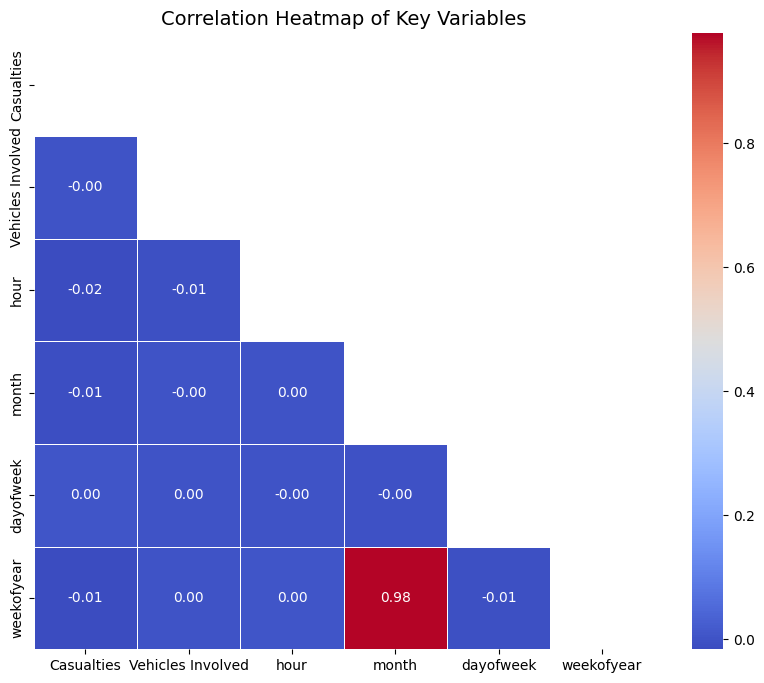

In [ ]:
# Calculate correlation between numeric variables
correlation_matrix = gta_df[['Casualties', 'Vehicles Involved', 'hour', 'month', 'dayofweek', 'weekofyear']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables', fontsize=14)
plt.show()


**Importing necessary libraries to run a random forest model**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


**To binarizes Casualties and splits the data into training (70%), validation (15%), and test (15%) sets.**






In [ ]:
# Convert 'Casualties' into a binary classification target (1 if there are casualties, 0 if no casualties)
gta_df['Casualties'] = (gta_df['Casualties'] > 0).astype(int)

# Convert 'weekofyear' to int64 before applying SMOTE
gta_df['weekofyear'] = gta_df['weekofyear'].astype('int64')

# Split the dataset into features (X) and target (y)
X = gta_df.drop(columns=['Casualties'])
y = gta_df['Casualties']

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Feature Scaling (Standardization)**

In [ ]:
# We select only numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])

# Transform validation and test data with the same scaler
X_val_scaled = scaler.transform(X_val[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

**Reintegrates scaled numeric features with the original non-numeric (encoded) features to reconstruct the full training, validation, and test sets.**









In [ ]:
# Reassemble the data after scaling, keeping non-numeric columns (after encoding)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
X_train_scaled = pd.concat([X_train.drop(columns=numeric_columns), X_train_scaled], axis=1)

X_val_scaled = pd.DataFrame(X_val_scaled, columns=numeric_columns, index=X_val.index)
X_val_scaled = pd.concat([X_val.drop(columns=numeric_columns), X_val_scaled], axis=1)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns, index=X_test.index)
X_test_scaled = pd.concat([X_test.drop(columns=numeric_columns), X_test_scaled], axis=1)


# **Random Forest Model**


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced_subsample',  # optional with SMOTE
    random_state=42
)

 Training a Random Forest model, evaluating its accuracy on the train, validation, and test sets, and displays the most important features contributing to the model's predictions.










In [ ]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation on Train, Validation, and Test sets
train_preds = rf_model.predict(X_train_scaled)
val_preds = rf_model.predict(X_val_scaled)
test_preds = rf_model.predict(X_test_scaled)

# Calculate accuracy for train, validation, and test sets
train_accuracy = accuracy_score(y_train, train_preds) * 100
val_accuracy = accuracy_score(y_val, val_preds) * 100
test_accuracy = accuracy_score(y_test, test_preds) * 100

# Display the accuracy results
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Step 7: Feature Importance (Optional)
importances = rf_model.feature_importances_
feature_names = X_train_scaled.columns

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)


Train Accuracy: 94.99%
Validation Accuracy: 87.47%
Test Accuracy: 86.73%

Feature Importance:
                              Feature  Importance
4                          weekofyear    0.189061
0                                hour    0.166421
2                           dayofweek    0.114016
1                               month    0.103167
3                   Vehicles Involved    0.094407
5               Weather Condition_Fog    0.024351
16           Cause_Mechanical Failure    0.023873
6              Weather Condition_Hail    0.023678
15                Cause_Drunk Driving    0.023465
10              Road Condition_Gravel    0.023080
18                     Cause_Speeding    0.023033
17             Cause_Reckless Driving    0.022933
14                 Road Condition_Wet    0.022267
7              Weather Condition_Rain    0.021879
19           Cause_Weather Conditions    0.021860
12               Road Condition_Snowy    0.021524
13  Road Condition_Under Construction    0.021519
11    

In [ ]:
# Step 8: Classification Metrics (for Test Set)

# Confusion Matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_preds))

# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_preds, digits=3, zero_division=0))



Confusion Matrix (Test Set):
[[  11  129]
 [  70 1290]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.136     0.079     0.100       140
           1      0.909     0.949     0.928      1360

    accuracy                          0.867      1500
   macro avg      0.522     0.514     0.514      1500
weighted avg      0.837     0.867     0.851      1500



# **LOGISTIC REGRESSION**

**Importing necessari libraries to run a logistic regression model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

**Logistic Regression Model**

In [ ]:
# To deal with class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
log_reg_model.fit(X_train_res, y_train_res)


# Step 5: Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')


# Train the model
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

**Model Evaluation**

In [ ]:
# Step 6: Model Evaluation on Train, Validation, and Test sets
train_preds = log_reg_model.predict(X_train_scaled)
val_preds = log_reg_model.predict(X_val_scaled)
test_preds = log_reg_model.predict(X_test_scaled)

# Calculate accuracy for train, validation, and test sets
train_accuracy = accuracy_score(y_train, train_preds) * 100
val_accuracy = accuracy_score(y_val, val_preds) * 100
test_accuracy = accuracy_score(y_test, test_preds) * 100

# Display the accuracy results
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Train Accuracy: 52.23%
Validation Accuracy: 51.47%
Test Accuracy: 51.47%


**Feature Importance**

In [ ]:
# Step 7: Feature Importance (based on logistic regression coefficients)

# Get the feature names (columns) from your final training DataFrame
feature_names = X_train_scaled.columns

# Get the model coefficients
coefficients = log_reg_model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value (most impactful first)
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
print("\nTop Feature Importances (Logistic Regression):")
print(feature_importance_df[['Feature', 'Coefficient']].head(10))



Top Feature Importances (Logistic Regression):
                     Feature  Coefficient
15       Cause_Drunk Driving    -0.113951
5      Weather Condition_Fog     0.098520
6     Weather Condition_Hail     0.096819
4                 weekofyear    -0.092240
17    Cause_Reckless Driving    -0.067078
16  Cause_Mechanical Failure    -0.061710
19  Cause_Weather Conditions    -0.056193
18            Cause_Speeding    -0.053441
8     Weather Condition_Snow     0.052204
12      Road Condition_Snowy    -0.050836


**Classification Matrix**

In [ ]:
# Step 8: Classification Metrics

# Print confusion matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_preds))

# Print classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_preds, digits=3))
print(classification_report(y_test, test_preds, digits=3, zero_division=0))


Confusion Matrix (Test Set):
[[ 72  68]
 [660 700]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.098     0.514     0.165       140
           1      0.911     0.515     0.658      1360

    accuracy                          0.515      1500
   macro avg      0.505     0.514     0.412      1500
weighted avg      0.836     0.515     0.612      1500

              precision    recall  f1-score   support

           0      0.098     0.514     0.165       140
           1      0.911     0.515     0.658      1360

    accuracy                          0.515      1500
   macro avg      0.505     0.514     0.412      1500
weighted avg      0.836     0.515     0.612      1500

